In [7]:
!nvidia-smi

Sun Sep  1 16:17:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [14]:
# Pip install method (recommended)

!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/78.2 GB disk)


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hLIWjtY2h9E4NF31u7GQ")
project = rf.workspace("ox-d8t1a").project("cone_detection-jx7bz")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Cone_Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

/content


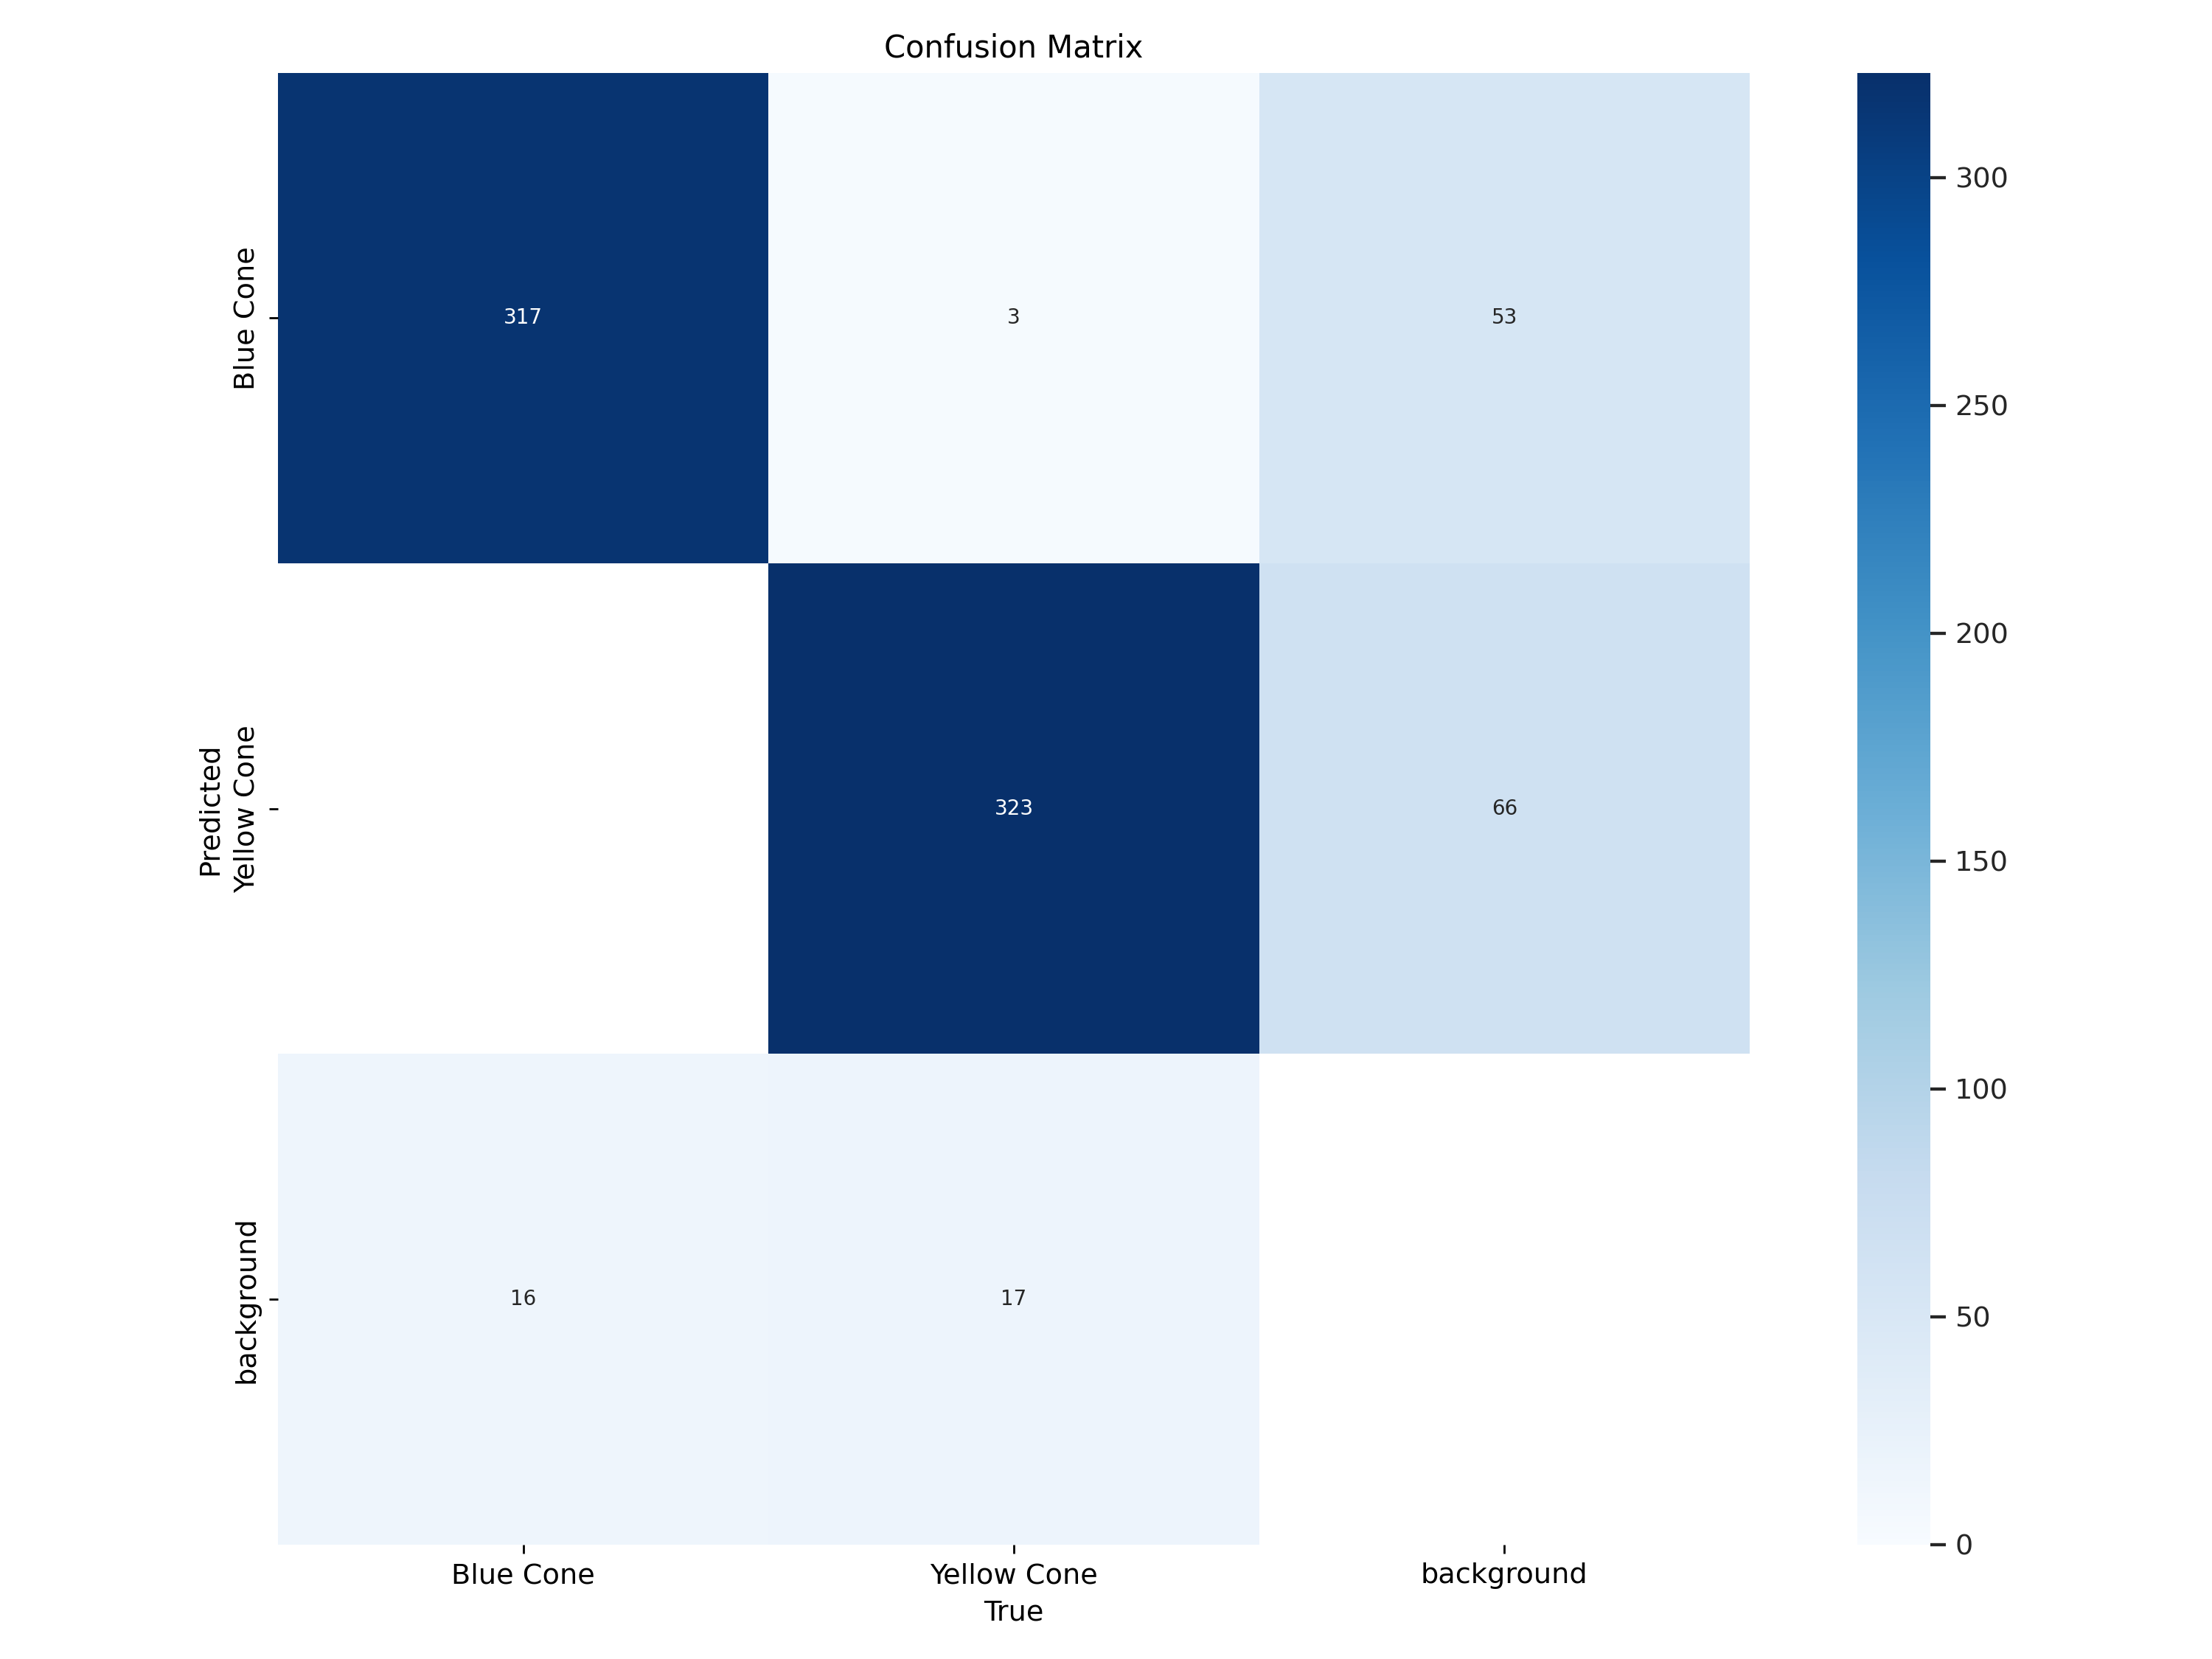

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=700)


/content


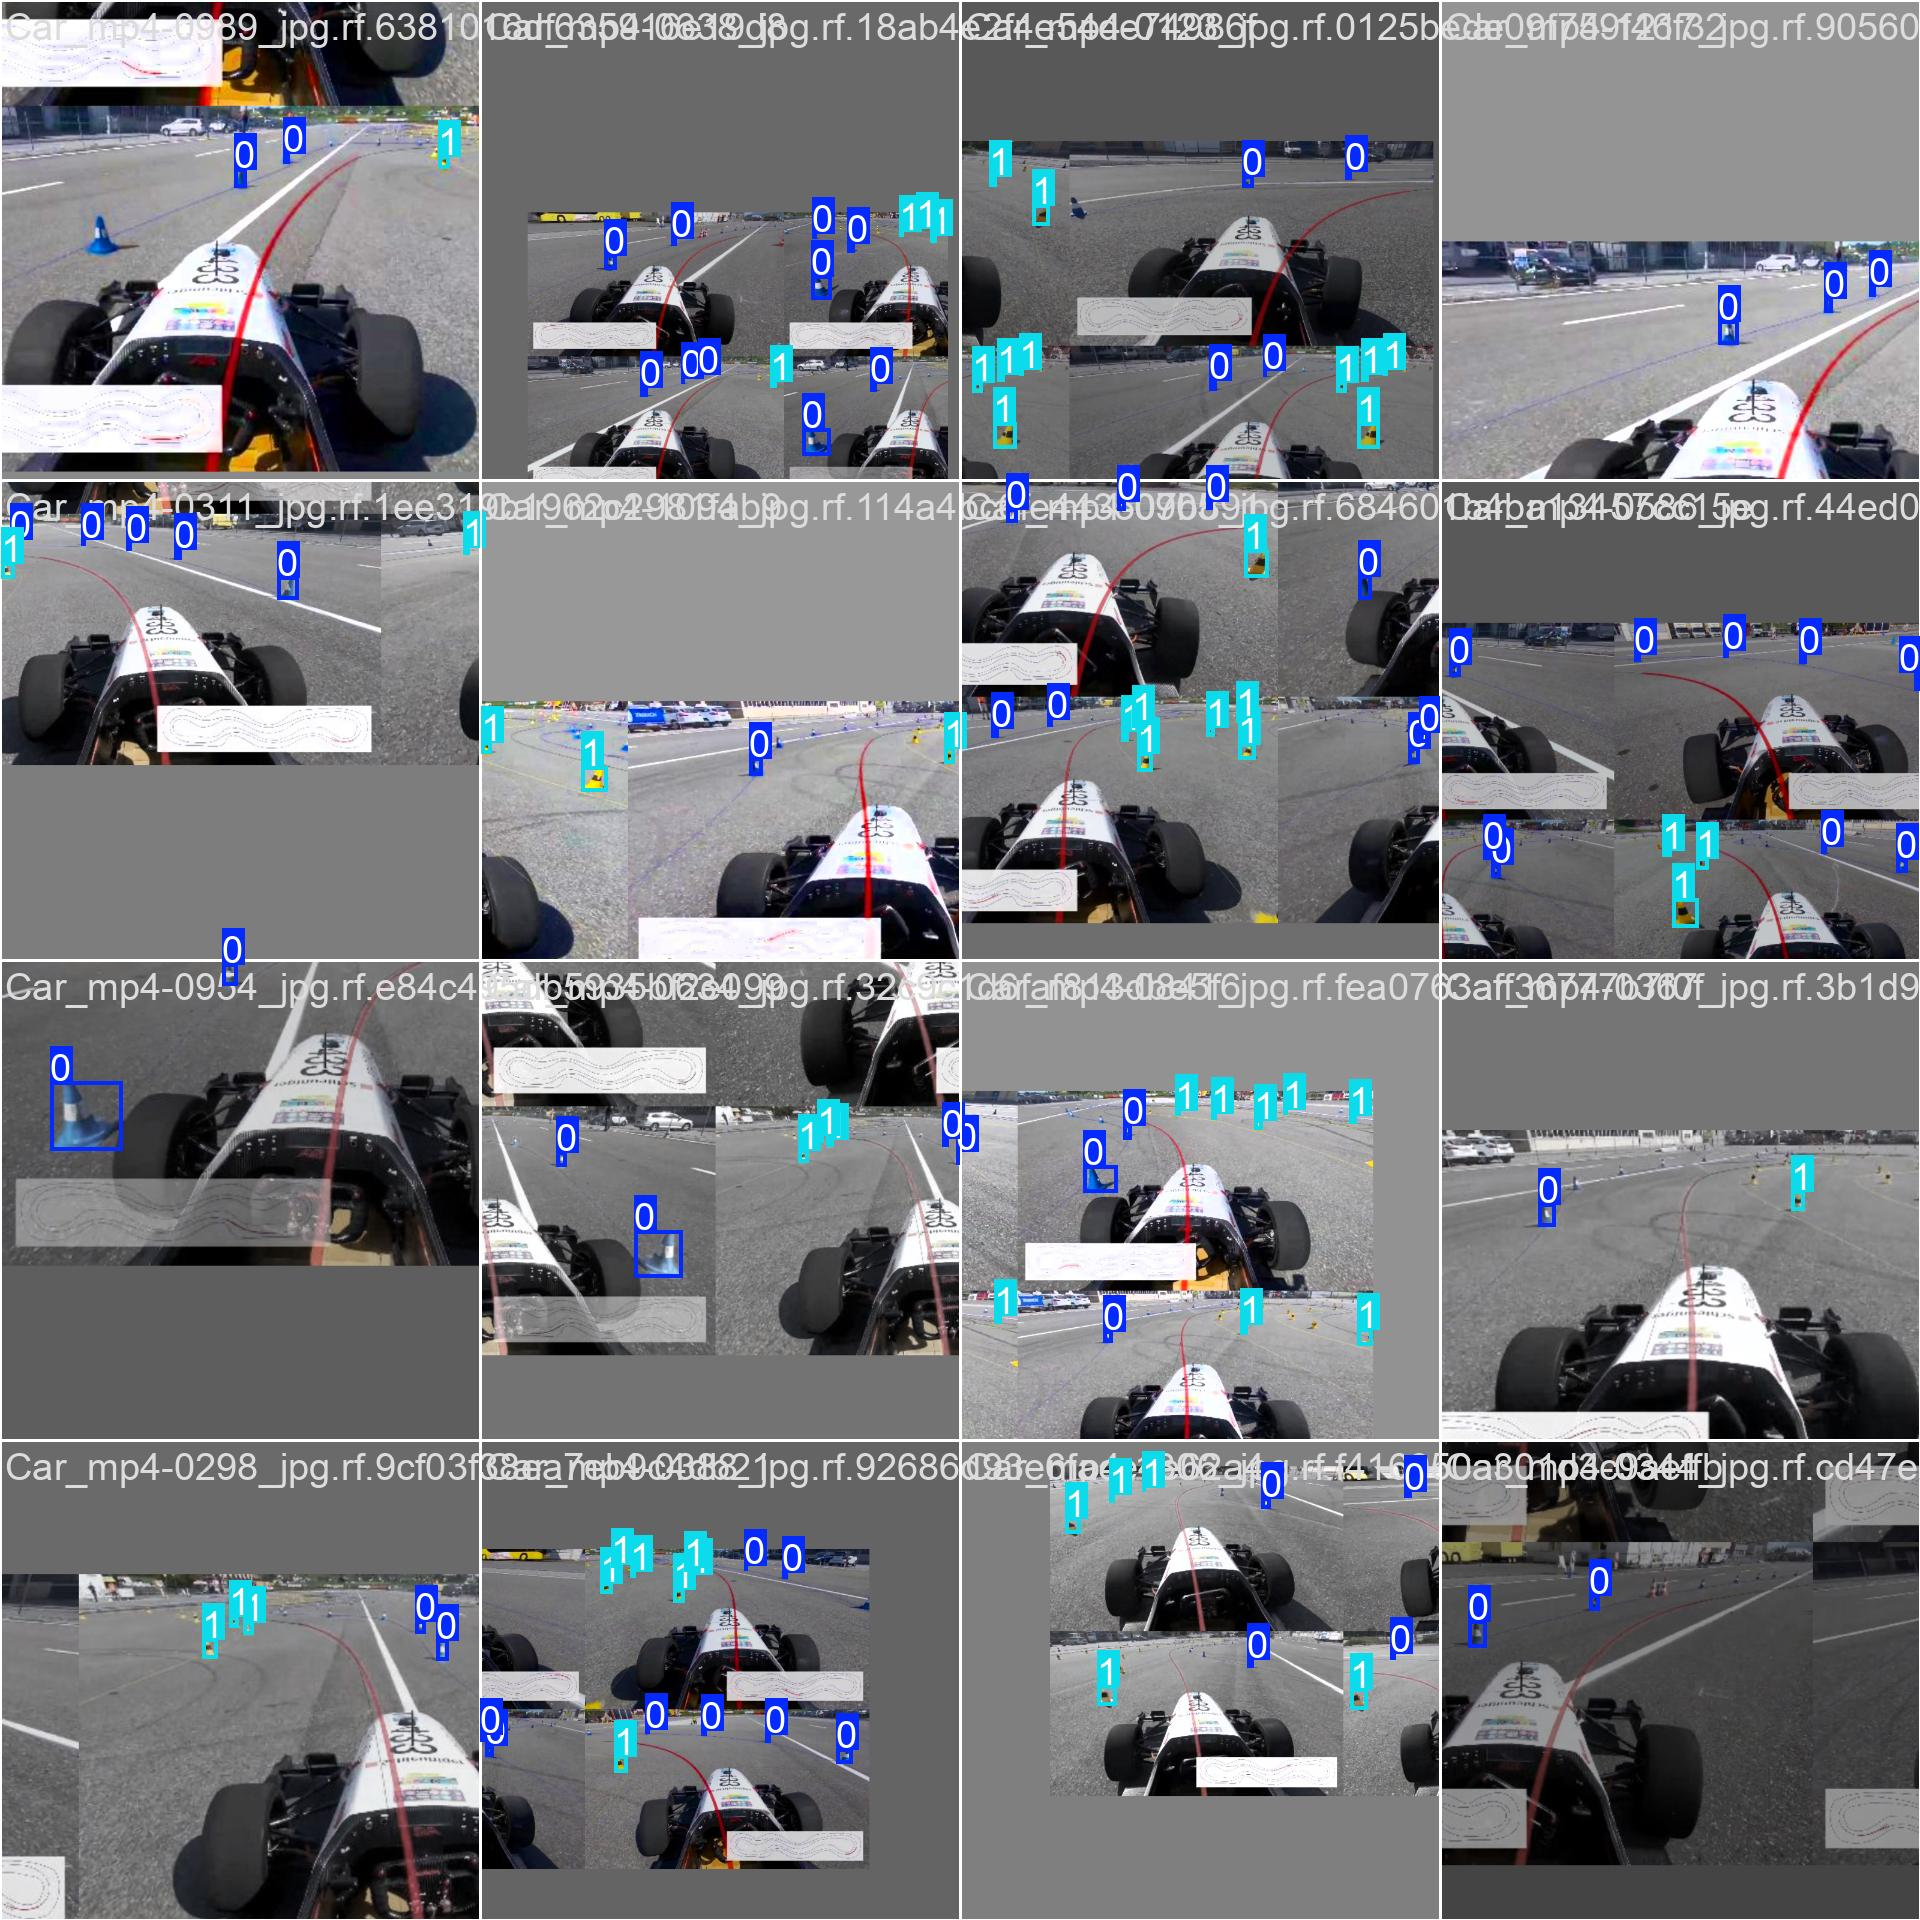

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/train_batch2.jpg', width=600)

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/72 /content/Cone_Detection-2/test/images/Car_mp4-0012_jpg.rf.2fa9b19869dac86b5f3f06092780d814.jpg: 480x800 3 Blue Cones, 2 Yellow Cones, 42.5ms
image 2/72 /content/Cone_Detection-2/test/images/Car_mp4-0043_jpg.rf.b44a6c3b8d28f6926a3cee54d36c7d23.jpg: 480x800 2 Blue Cones, 6 Yellow Cones, 15.7ms
image 3/72 /content/Cone_Detection-2/test/images/Car_mp4-0071_jpg.rf.dbd646d7ee26204995eb1f9b3ac533c0.jpg: 480x800 2 Blue Cones, 5 Yellow Cones, 15.5ms
image 4/72 /content/Cone_Detection-2/test/images/Car_mp4-0073_jpg.rf.7e8ee114c91bfe748e785772cb43d053.jpg: 480x800 2 Blue Cones, 5 Yellow Cones, 15.5ms
image 5/72 /content/Cone_Detection-2/test/images/Car_mp4-0086_jpg.rf.53bde7b5ce288288df9689a083e27f82.jpg: 480x800 2 Blue Cones, 3 Yellow Cones, 15.5ms
image 6/72 /content/Cone_Detection-2/test/images/Car_mp4-009

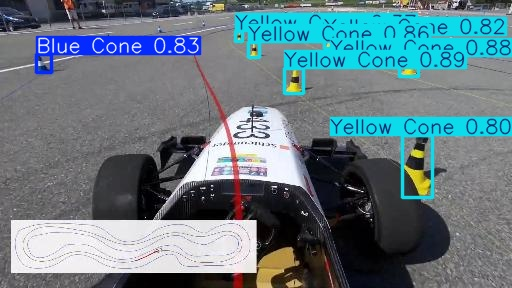

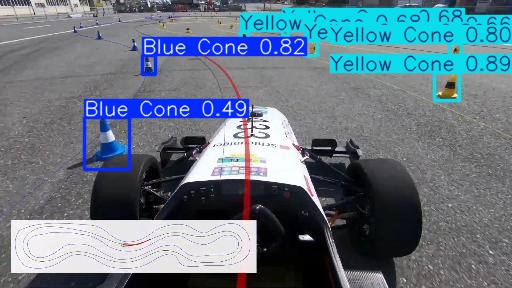

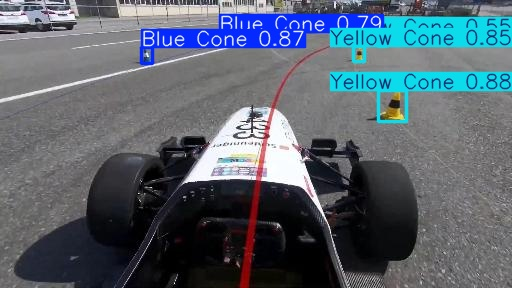

In [25]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [26]:
car_vid= '/content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4'

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4 save=True

/content
Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 2 Blue Cones, 5 Yellow Cones, 40.3ms
video 1/1 (frame 2/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 2 Blue Cones, 3 Yellow Cones, 15.7ms
video 1/1 (frame 3/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 3 Blue Cones, 4 Yellow Cones, 15.6ms
video 1/1 (frame 4/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 2 Blue Cones, 6 Yellow Cones, 15.7ms
video 1/1 (frame 5/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 2 Blue Cones, 5 Yellow Cones, 15.7ms
video 1/1 (frame 6/1143) /content/drive/MyDrive/CURT_Omar_Mohamed/Task_1/CAR.mp4: 480x800 2 Blue Cones, 5 Yellow Cones, 15.6ms
video 1/1 (frame 7/1143) /content/drive/MyDrive/CURT_Omar_